# Introduction to Machine Learning on Python
### by Ignasi Pérez-Ràfols

This notebook intends to offer a basic introduction to key Machine Learning concepts and how to implement different typical models using the sklearn module in Python. It will not cover any topic in depth, this is not the intended topic in this notebook. The intended topic is to familiarize us with the key concepts, and also to signal some of the potential problems. It will also provide with some working examples on how to run the Machine Learning algorithms in Python. 

<small><i>This notebook is based on the notes of the course Introduction to Data Science & Big Data (from University of Barcelona)</small></i>


# TOC<a class="anchor" id="TOC"></a>
1. [About the software](#About the software)
2. [What is Machine Learning?](#What is Machine Learning?)
3. [Modeling the machine learning problem](#Modeling the machine learning problem)
4. [Raw data vs feature extraction](#Raw data vs feature extraction)
5. [A classification example: reognizing hnad-written numbers](#A simple classification example)
6. [Train, test, validation](#Train, test, validation)
7. [Scikit-learn's estimator interface](#Scikit-learn's estimator interface)
8. [Supervised learning](#Supervised learning)
9. [Confusion matrix](#Confusion matrix)
10. [Unsupervised learning](#Unsupervised learning)
11. [Model selection and performance report](#Model selection)
12. [Dangers of the Machine Learning](#Dangers)
13. [Final remarks](#Final remarks)

# 1. About the software: Scikit-Learn <a class="anchor" id="About the software"></a>
[Back to TOC](#TOC)

+ Scikit-Learn is a Machine learning library writen in Python.
+ Simple and efficient, for both experts and non-experts.
+ Classical, well-established machine learning algorithms.
+ BSD 3 license.

## 1.1 Integration in the scientific Python ecosystem

The open source Python ecosystem provides a standalone, versatile and powerful scientific working environment, including:

+ NumPy (for efficient manipulation of multi-dimensional arrays);
+ SciPy (for specialized data structures (e.g., sparse matrices) and lower-level scientific algorithms),
+ IPython (for interactive exploration),
+ Matplotlib (for vizualization)
+ Pandas (for data management and data analysis)
+ (and many others...)

Scikit-Learn builds upon NumPy and SciPy and complements this scientific environment with machine learning algorithms; By design, Scikit-Learn is non-intrusive, easy to use and easy to combine with other libraries. We will use Scikit-Learn as a tool for understanding machine learning.

# 2. What is Machine Learning?<a class="anchor" id="What is Machine Learning?"></a>
[Back to TOC](#TOC)

**Machine Learning** is about coding programs that **automatically adjust their performance** from exposure to information encoded in data. This learning is achieved via a parameterized model with tunable parameters automatically adjusted according to a performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are two main classes of Machine Learning algorithms:

   * Supervised learning : Algorithms which learn from a training set of labeled examples (exemplars) to generalize to the set of all possible inputs. Examples of techniques in supervised learning include regression and support vector machines. In astronomy, this usually implies having a large amount of data to be visually inspected.
    
   * Unsupervised learning : Algorithms which learn from a training set of unlableled examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation. In astronomy, this implies visually inspecting some members of each group to infer the properties of the grup


# 3. Modeling the machine learning problem<a class="anchor" id="Modeling the machine learning problem"></a>
[Back to TOC](#TOC)

The first step to apply machine learning is identifying an interesting question to answer. According to the type of answer we are seeking we are directly aiming for a certain set of techniques.

+ If our question is answered by *YES/NO*, we are in front of a **classification** problem. Classifiers are also the techniques to use if our question admits only a discrete set of answers, i.e. we want to select among a finite number of choices.  

    + Given a set of stellar spectra, which are their stellar types?

    + Given a set of SDSS spectra, which are stars, which are galaxies and which are quasars?
    
    + Given a set of stellar properties, which were formed in the same cloud?
    
    + Given the photometric images of a set of galaxies, to which Hubble class they belong to?
    
    + ...
    
+ If our question is a prediction of a (usually real valued) quantity, we are in front of a **regression** problem.

    + Given a set of spectra of quasars, what is their redshifts?
    
    + Given a set of spectra from stars, what are their temperatures?
    
    + Given a set of galaxies, what is their star formation rate?
    
    + ...
    
    
Keep in mind that some problems can be solved using both regression and classification: many classification algorithms are thresholded regressors. Also, there are a number of algorithms that can be selected for any given problem. So, which one do we choose? Here is a chart with some suggestions based on the properties of your problem question and your dataset:

![title](http://scikit-learn.org/stable/_static/ml_map.png)

 # 4. Raw data vs feature extraction<a class="anchor" id="Raw data vs feature extraction"></a>
[Back to TOC](#TOC)

**Raw data**

Advantages:

+ No domain specific knowledge is required.

Drawbacks:

+ Highly redundant in many cases and usually span very large dimensional spaces.
+ Unknown discriminability.

**Feature extraction**

Advantages:

+ Attempt to capture discriminant information in the data.
+ Lower dimensionality and complexity.

Drawbacks: 

+ Domain specific knowledge is required.

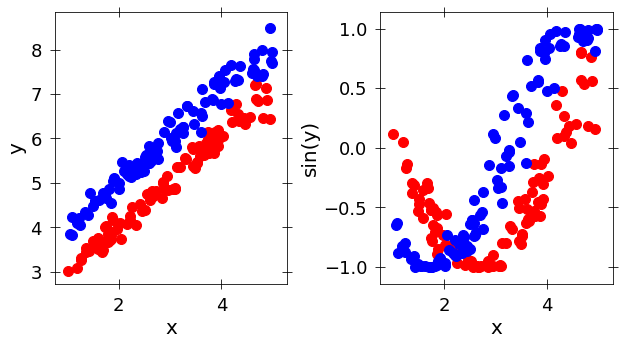

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

N = 100
sigma=0.05
# 1st line y = x + 2 in range (1, 5), consider an error of sigma in both slope and zero-point
x1 = 4*rand.rand(N) + 1
y1 = (1 + sigma*rand.randn(N))*x1 + 2*(1 + sigma*rand.randn(N))

# 2nd line y = x + 3 in range (1, 5), consider an error of sigma in both slope and zero-point
x2 = 4*rand.rand(N) + 1 
y2 = (1 + sigma*rand.randn(N))*x2 + 3*(1 + sigma*rand.randn(N))

# set figure configuration
titlesize = 25
fontsize = 20
labelsize = 18
ticksize = 10
ticksize2 = 6
xlim = (40, 310)
ylim = (0.9, 2.1)
pad = 8
markersize = 36
cmap = plt.cm.get_cmap('jet')

# create figure 
fig = plt.figure(figsize=(10, 5))
axes_grid = gridspec.GridSpec(1, 2)
axes_grid.update(wspace=0.4)

# plot y vs x
ax = fig.add_subplot(axes_grid[0])
ax.scatter(x1, y1, color="r", s=100)
ax.scatter(x2, y2, color="b", s=100)
ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")


# plot |x-y| vs x
ax2 = fig.add_subplot(axes_grid[1])
ax2.scatter(x1, np.sin(y1), color="r", s=100)
ax2.scatter(x2, np.sin(y2), color="b", s=100)
ax2.set_xlabel("x", fontsize=fontsize)
ax2.set_ylabel("sin(y)", fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")

# 5. A simple classification example<a class="anchor" id="A simple classification example"></a>
[Back to TOC](#TOC)


**The problem:** Consider the problem of handrwiten digits recognition. Given an image of a handwriten digit we want to build a classifier that recognizes the correct label.

The formalization of the problem consists of $N$ data pairs $S = \{(x_i,y_i)\},\; i = 1\dots N$ where $x_i \in {\bf R}^d$ is composed of $d$ features/descriptors and $y_i \in \{1,\dots,K\}$ is a discrete target label. In our current problem, we have $N = 1797$ data examples of handwritten numbers. Each sample is an $8\times 8$ image. The representation of each data sample is encoded in vector. For this reason we flatten the image and reshape it to a vector with $d=64$ corresponding to the gray values/brightness of each pixel of the image. $y_i$ is the value of the target class the number belongs to.

Let us start loading the data set.

In [2]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

Now, check the data just loaded.

In [3]:
#Check the data format.
X, y = digits.data, digits.target

print X.shape
print y.shape

(1797, 64)
(1797,)


Let us visualize the sample.

(64,)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


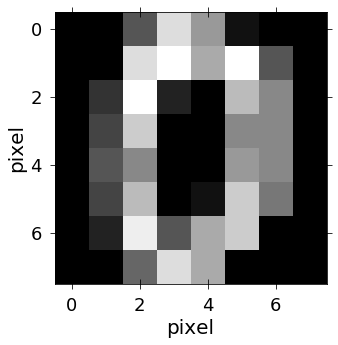

In [4]:
%matplotlib inline
# The original digit has been flattened, so we reshape it back to its original form
# Check the dimensionality of the data, e.g. the first element in the data set X[0]
print X[0].shape
print X[0]

# Reshape it to 8x8 to recover the original image
print X[0].reshape((8,8))


# Show the image using maptlotlib package
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(5, 5))
axes_grid = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(axes_grid[0])
ax.imshow(X[0].reshape((8,8)),cmap="gray",interpolation="nearest")
ax.set_xlabel("pixel", fontsize=fontsize)
ax.set_ylabel("pixel", fontsize=fontsize)
ax.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")


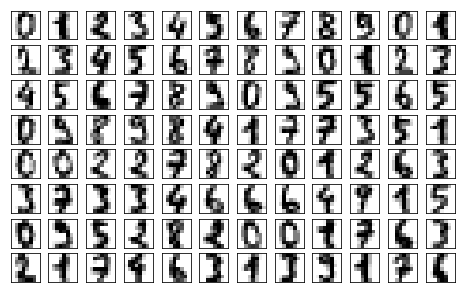

In [5]:
#Visualize some of the data.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 5))
axes_grid = gridspec.GridSpec(8, 12)
axes = []
for i, grid in enumerate(axes_grid):
    axes.append(fig.add_subplot(grid))
    axes[i].imshow(digits.data[i].reshape(8, 8), cmap=plt.cm.binary)
    axes[i].tick_params(axis='both', bottom=False, 
                        left=False, labelbottom=False, labelleft=False, )
    


A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical. However, in most of sklearn algorithms, NaNs are not accepted.

$${\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

#### Data set jargon

Considering data arranged as in the previous section we refer to:

+ the **columns** as features, attributes, dimensions, regressors, covariates, predictors, independent variables,
+ the **rows** as instances, examples, samples.
+ the **target** as label, outcome, response, dependent variable.

# 6. Train, test, validation<a class="anchor" id="Train, test, validation"></a>
[Back to TOC](#TOC)

Now that we have our sample we will want to use an algorithm to be able to correctly classify new data that we're likely to obtain later. What is more, we want to obtain the best posible model. We can try different algorithms or the same algorithm with different hyperparameters. The hyperparamenters in a model are some parameters that are inherent to the model (and are not related at all with the data) to allow for flexible configurations. For example, in the case of the K-nearest neighbours, the number of neighbours considered is a hyperparameter. Finally, we will want to know how good is our algorithm performing.

To obtain these objectives we split our sample in three subsamples
* **Train**: A set of examples used for learning
* **Test**: A dataset independent from the training dataset, but that follows the same probability distribution
* **Validation**: Training data used by testing to choose between the models


**The training dataset is used to train the candidate algorithms, the validation dataset is used to compare their performances and decide which one to take and, finally, the test dataset is used to obtain the performance characteristics**

In [6]:
from sklearn.model_selection import train_test_split

# split the sample into train/test. Keep 20% of the data for testing purposes
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=.2, random_state=303035)

# the validation sample is part of the training sample. Keep 20% of the data for validation purposes
X_train, X_validation, y_train, y_validation = train_test_split(X_train_all, y_train_all, test_size=.2, random_state=904987)

print "Size of train: {}".format(y_train.size)
print "Size of test: {}".format(y_test.size)
print "Size of validation: {}".format(y_validation.size)

Size of train: 1149
Size of test: 360
Size of validation: 288


# 7. Scikit-learn's estimator interface<a class="anchor" id="Scikit-learn's estimator interface"></a>
[Back to TOC](#TOC)

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
    
- A list and description of the available estimators can be found [here](http://scikit-learn.org/stable/) 

# 8. Supervised learning<a class="anchor" id="Supervised learning"></a>
[Back to TOC](#TOC)

Now that we have our train and validation sample we can start with the modeling. We'll keep the test sample for later, when we'll have chosen our best model.

Let us choose a model and fit the data

In [7]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

We may want to save the model for later. There is a useful package to do this is pickle. It will allow us to save the model in a python binary file so that when we load them it retains the properties of the model. **BEWARE:** If we want to use the model in another computer, then the sklearn version of the new computer **MUST** be the same as that used to save the model.

In [8]:
# Save the model to disk
import pickle
ofname = open('my_supervised_classifier.pkl', 'wb')
s = pickle.dump(knn,ofname)
ofname.close()

In [9]:
# Load the model to disk
import pickle
ofname = open('my_supervised_classifier.pkl','rb') #Open in binary format. You never know how it was saved.
knn = pickle.load(ofname)
ofname.close()

Now we are ready to use the model in _new_ data to test the performance of the model. Keep in mind that we are not sure that this is the best model we can make so we'll be using the **validation** sample to test the performance of this model

In [10]:
# predict the results
y_pred_supervised = knn.predict(X_validation)

# 9. Confusion matrix<a class="anchor" id="Confusion matrix"></a>
[Back to TOC](#TOC)

There are a number of metrics that will help us decide which is the best model. Most of them are based on the information stored in the confusion matrix. The elements of the confusion matrix $M$ are defined as follows,
$$M(i,j) = \mbox{# of samples from class j predicted as class i}$$

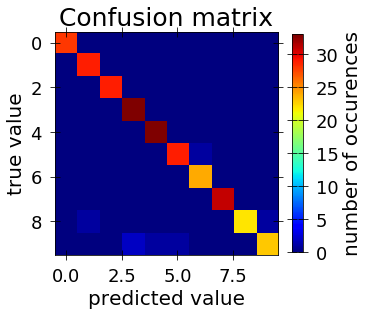

In [11]:
from sklearn import metrics

def plot_confusion_matrix(y, y_pred):
    """Function that takes the true values (y) and the predicted values (y_pred) and produces the confusion matrix.
        Returns the confusion matrix"""
    # compute confusion matrix
    confusion_matrix = metrics.confusion_matrix(y, y_pred)
    
    # create figure & plot confusion matrix
    fig = plt.figure(figsize=(5, 5))
    axes_grid = gridspec.GridSpec(1, 1)
    ax = fig.add_subplot(axes_grid[0]) 
    cm = ax.imshow(confusion_matrix, cmap=cmap, interpolation='nearest')
    cbar = plt.colorbar(cm, ax=ax, shrink=0.8)
    ax.set_title("Confusion matrix", fontsize=titlesize)
    ax.set_ylabel('true value', fontsize=fontsize)
    ax.set_xlabel('predicted value', fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")
    cbar.ax.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, left=True, length=ticksize, direction="inout")
    cbar.ax.set_ylabel("number of occurences", fontsize=fontsize)
    
    return confusion_matrix
        
    
confusion_matrix_supervised = plot_confusion_matrix(y_validation, y_pred_supervised)

To compare the results of this model with the unsupervised model that we'll do later let's measure the purity of the prediction. The purity, $p$ is defined as
$$p = \frac{\text{number of correct classifications}}{\text{total number of classifications}}$$


In [12]:
import numpy as np
purity_supervised = np.diag(np.diag(confusion_matrix_supervised)).sum()/confusion_matrix_supervised.sum()
print "purity for the supervised model = {:.2%}".format(purity_supervised)

purity for the supervised model = 97.57%


We can easily see that this works better than a random prediction

purity for the random model = 7.99%


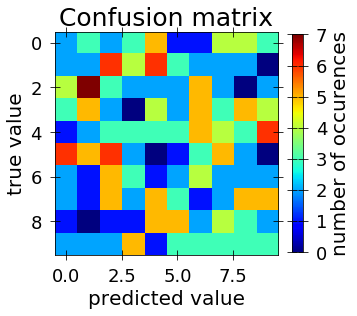

In [13]:
y_pred_rand = np.array([rand.randint(0, 10) for i in range(y_validation.size)])
confusion_matrix_random = plot_confusion_matrix(y_validation, y_pred_rand)
purity_random = np.diag(np.diag(confusion_matrix_random)).sum()/confusion_matrix_random.sum()
print "purity for the random model = {:.2%}".format(purity_random)

# 10. Unsupervised learning<a class="anchor" id="Unsupervised learning"></a>
[Back to TOC](#TOC)

Now that we have seen how the supervised learning works, we'll take a look at unsupervised learning. We will pretend that we do not know the labels of the data in our sample. Similarly to the supervised model, we choose a model and train it using the train sample

In [14]:
from sklearn import cluster

# train the model KMeans
clf = cluster.KMeans(init='random', n_clusters=10, random_state=174004)
clf.fit(X_train)

# we save it!
import pickle
ofname = open('my_unsupervised_classifier.pkl', 'wb')
s = pickle.dump(knn,ofname)
ofname.close()

Now let's do our prediction

In [15]:
cluster_number_pred_unsupervised = clf.predict(X_validation) # equivalent
print cluster_number_pred_unsupervised

[3 1 7 3 2 9 7 1 6 8 5 5 6 5 1 8 1 3 6 5 0 2 6 7 0 6 0 6 5 1 4 2 8 7 3 5 0
 0 6 1 0 3 8 0 8 3 2 9 2 7 8 7 7 6 9 8 4 7 4 0 7 2 6 1 2 6 0 3 0 6 7 0 3 7
 0 4 4 2 1 1 1 1 7 2 6 9 2 6 4 1 3 0 1 7 2 7 3 9 1 0 0 2 3 0 0 3 7 3 2 8 8
 5 6 5 3 5 5 7 4 6 4 7 4 6 3 3 3 7 5 0 0 5 2 4 8 4 1 4 3 6 8 4 6 5 5 0 5 0
 9 0 6 8 1 8 6 2 1 8 4 8 8 3 3 5 3 0 2 2 0 0 1 0 2 6 1 8 0 2 6 6 7 4 2 5 1
 2 9 2 1 2 8 6 6 2 4 5 3 4 4 6 3 0 0 6 5 8 9 4 2 1 7 2 7 2 1 4 6 5 0 2 9 8
 1 4 0 8 8 8 8 6 7 6 9 5 9 6 7 5 0 5 4 6 6 2 0 8 1 0 0 3 0 8 3 7 3 5 4 0 3
 6 4 1 0 7 6 7 4 1 2 4 0 4 7 2 2 8 7 2 3 9 1 2 6 9 5 7 9 2]


But, whait a minute! What do these numbers mean? How is it possible that the clustering procedure is guessing the number in the image?

**It's not.** These numbers are not an actual prediction, they are an arbitrary number used to identify the cluster. This only means that all the values that belong to cluster number 7 are similiar. It is not tellin anything about the actual number on the images! 

We need to explore the data in each group in order to understand what each cluster means. Fortunately, we know the labels for the traning and validation samples (i.e., we have _visually inspected_ them). Let's explore the correspondance. However we cannot use the results for the validation, that would be cheating, we need to use the values of the training

(array([  0.,   0.,   1.,   6.,   0.,  36.,   0.,   0.,  31.,  89.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]), <a list of 10 Patch objects>)


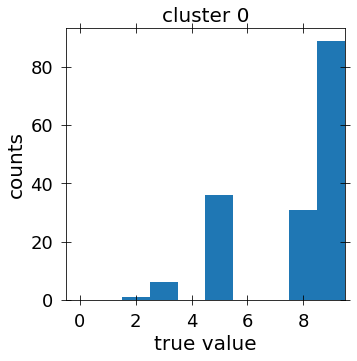

In [16]:
# find the positions in the array where the cluster label is 0
pos = np.where(clf.labels_ == 0)
# select these position from the true values 
numbers_in_cluster = y_train[pos]

# plot the histogram
fig = plt.figure(figsize=(5, 5))
axes_grid = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(axes_grid[0]) 
print ax.hist(numbers_in_cluster, range=(-0.5,9.5), align="mid")
ax.set_xlim(-0.5,9.5)
ax.set_title("cluster 0", fontsize=fontsize)
ax.set_ylabel('counts', fontsize=fontsize)
ax.set_xlabel('true value', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")


We can conclude that the cluster 0 is comprised of images with number 9!
Let's check the rest

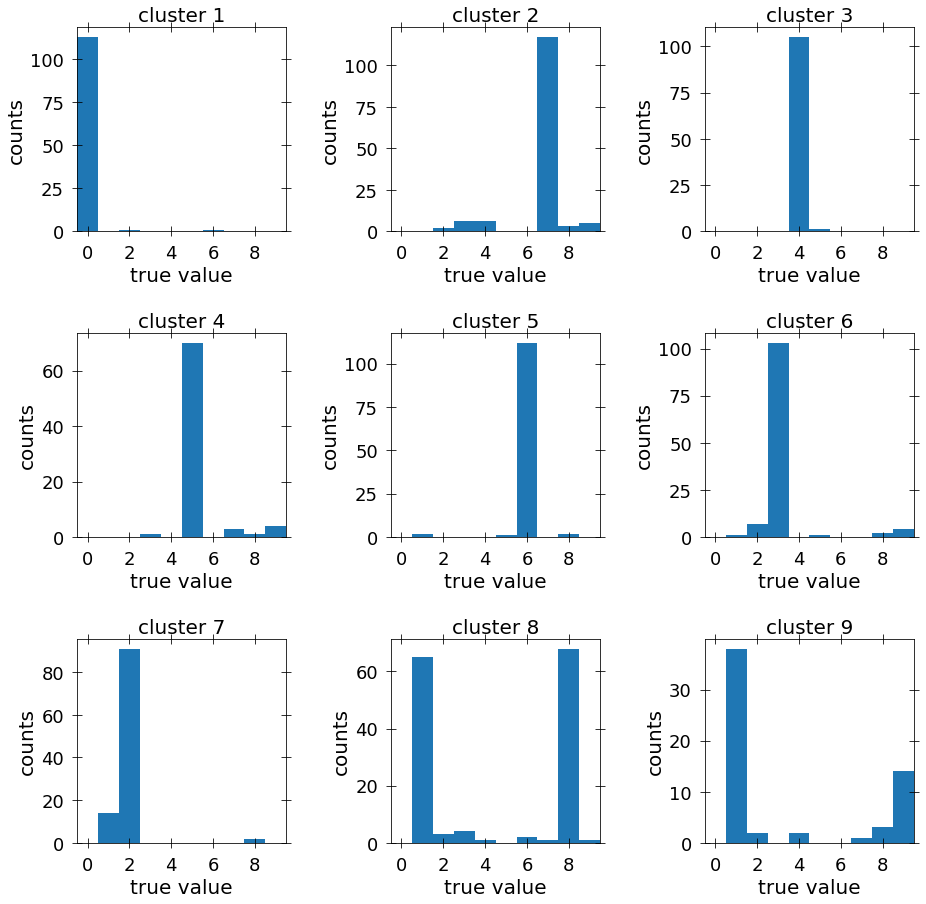

In [17]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(2)

fig = plt.figure(figsize=(15, 15))
axes_grid = gridspec.GridSpec(3, 3)
axes_grid.update(hspace=0.5, wspace=0.5)
axes = []
for i in range(1, 10):
    # find the positions in the array where the cluster label is i
    pos = np.where(clf.labels_ == i)
    # select these position from the true values 
    numbers_in_cluster = y_train[pos]
    
    # plot the result
    axes.append(fig.add_subplot(axes_grid[i-1]))
    axes[i-1].hist(numbers_in_cluster, range=(-0.5,9.5), align="mid")
    axes[i-1].set_title("cluster {}".format(i), fontsize=fontsize)
    axes[i-1].set_ylabel('counts', fontsize=fontsize)
    axes[i-1].set_xlabel('true value', fontsize=fontsize)
    axes[i-1].tick_params(axis='both', labelsize=labelsize, pad=pad, top=True, right=True, length=ticksize, direction="inout")
    axes[i-1].set_xlim(-0.5,9.5)
    axes[i-1].xaxis.set_major_locator(majorLocator)

We can see the following correspondance:

|cluster label|number|
|-------------|------|
| 0 | 9 |
| 1 | 0 |
| 2 | 7 | 
| 3 | 4 |
| 4 | 5 |
| 5 | 6 |
| 6 | 3 |
| 7 | 2 |
| 8 | 1 or 8 --> 8 |
| 9 | 1 |

We can now compute the predicted value based on this translation table

purity for the unsupervised model = 77.08%


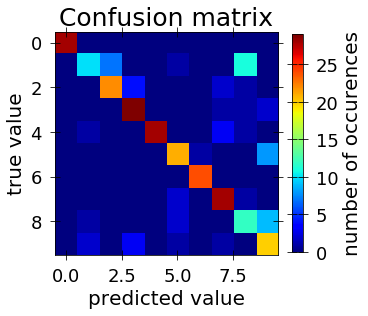

In [18]:
# create a dictionary to translate 
cluster_label_to_number = {0: 9, 1: 0, 2: 7, 3: 4, 4: 5, 5: 6, 6: 3, 7: 2, 8: 8, 9: 1}

# compute the predictions
y_pred_unsupervised = np.array([cluster_label_to_number.get(item) for item in cluster_number_pred_unsupervised])

# compute the confusion matrix
confusion_matrix_unsupervised = plot_confusion_matrix(y_validation, y_pred_unsupervised)

# and the purity
purity_unsupervised = np.diag(np.diag(confusion_matrix_unsupervised)).sum()/confusion_matrix_unsupervised.sum()
print "purity for the unsupervised model = {:.2%}".format(purity_unsupervised)

# 11. Model selection and performance report<a class="anchor" id="Model selection"></a>
[Back to TOC](#TOC)

Now that we have analysed different models (in this case supervised KNeighbours and unsupervised KMeans) we have to choose which is the best model. If we take our metric to be the purity, it is clear that the supervised method offering a superior performance. 

Once the model is chosen we report its performance using the test sample (remember that we have reserved part of the data for this purpose). We can retrain the model using all the training data (including the validation sets). 

purity for the chosen model = 98.33%


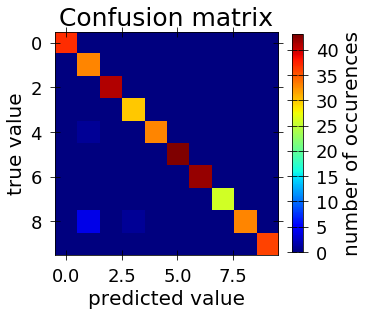

In [19]:
# retrain using all avaiable data
chosen_model = knn.fit(X_train_all, y_train_all) 

# compute the predictions
y_pred = chosen_model.predict(X_test)

# compute the confusion matrix
confusion_matrix = plot_confusion_matrix(y_test, y_pred)

# and the purity
purity = np.diag(np.diag(confusion_matrix)).sum()/confusion_matrix.sum()
print "purity for the chosen model = {:.2%}".format(purity)

Note that this value is not the same as the value obtained by the chosen model when using the validation sample.

In [20]:
print "purity for the supervised model = {:.2%}".format(purity_supervised)

purity for the supervised model = 97.57%


But if this value is different (in this case higher), can't the value for the rejected models be better when confronted with the test sample?

Might we compute the score for the rejected model using the test sample? 

## DON'T

If we compute this we might be tempted to change our decision, and this would compromise the independence of the train sample and the test sample. The test sample **must** remain independent from the train sample

Now that we have reported the preformance of the selected model we may do a final training including everything we have, even the test data. However, once we do this, we cannot do any more tests on the performace of the model

# 12. Dangers of the Machine Learning<a class="anchor" id="Dangers"></a>
[Back to TOC](#TOC)

We will now review some of the most important dangers of using Machine Learning. These may seem obvious things to consider, but sometimes they're so evident that we overlook them. Note that this is not intended to be an exhaustive list, only to singal the most important ones

### 12.1 Not independence of the test sample

As mentioned above we can esaily be tempted to use the scores obtained using the test sample to influence our choice. This would compromise the independence of the test sample. However, this is not the only case in which this independence is not guaranteed. A common mistake is to use a subset of the training sample as the test sample. Beware of keeping the samples independent!

### 12.2 Sample not representative or too small

The performance scores of the model are only going to be representative of the actual behaviour of the model if two conditions are met:
   1. The training, validation, and test samples are large enough
   2. The distribution of the samples is the same as (or very similar to) the real distribution
   
This means that if we want to use mock data to model a problem we need to include all the different contaminants we expect, and with the right numbers.

To check that the samples are large enough we can build test samples of different sizes (all of them independent of the training samples) and check that the scores are converged.

### 12.3 Overfitting

Sometimes we have so many parameters that we produce overfitting. It's like trying to fit a 10th degree polynomial to 4 datapoints. Sure, the resulting model will go exactly through the 4 datapoints, but its predictive power will be low... This is usually the case when using neural networks, the number of neurons quickly grows and this can easily lead to overfitting. 

A good way to detect overfitting is to check that the scored obtained when applying the model to the train data is not significantly higher than the score obtained when applying it to the validation data (remember, do not touch the test sample in the learning procedure)


purity for the train sample = 98.52%
purity for the validation sample = 97.57%


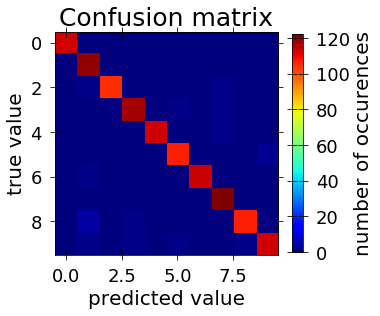

In [21]:
# compute the predictions for the train sample
y_pred_train = knn.predict(X_train)

# compute the confusion matrix
confusion_matrix_train = plot_confusion_matrix(y_train, y_pred_train)

# and the purity
purity_train = np.diag(np.diag(confusion_matrix_train)).sum()/confusion_matrix_train.sum()
print "purity for the train sample = {:.2%}".format(purity_train)
print "purity for the validation sample = {:.2%}".format(purity_supervised)

# 13. Final remarks<a class="anchor" id="Final remarks"></a>
[Back to TOC](#TOC)

* Machine Learning is a powerful technique to solve many problems
* Machine Learning requires large samples that are statistically representative of the problem
* **Visual inspection** of the data is required in both supervised and unsupervised learning
* Understanding of the data wil likely improve the eficiency of the algorithm
* Choosing the correct metric to compute the score is essential